In [1]:
%matplotlib inline

In [2]:
import json
import pylab
import numpy as np
from dateutil.parser import parse
from pysurvey.plot import setup, icolorbar, dateticks

In [3]:
out = []
with open('/Users/ajmendez/data/smartmeter/scmp_2016.01.15.json', 'r') as f:
    for line in f.readlines():
        if "Time" in line:
            out.append(json.loads(line))

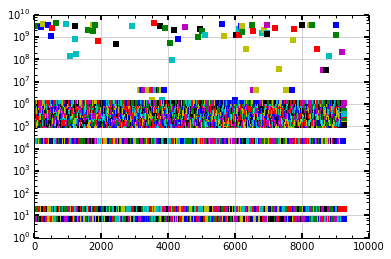

In [4]:
setup(ylog=True, xlog=False)
for i, item in enumerate(out):
    msg = item['Message']
#     print msg['EndpointID']
    pylab.plot(i, msg['Consumption'], 's', lw=0, markeredgecolor='none')

Grouped by type


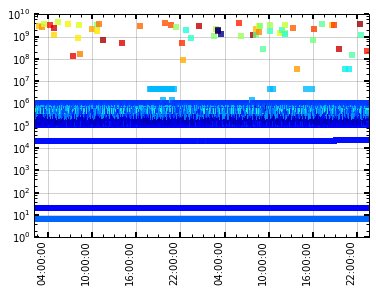

In [7]:
tmp = [item['Message']['EndpointID'] for item in out]
utmp = np.unique(tmp)
colors = {x:pylab.cm.jet(i*1.0/len(utmp)) for i,x in enumerate(utmp)}

setup(ylog=True)
for i, item in enumerate(out):
    msg = item['Message']
    tmp = parse(item['Time'])
    color = colors[msg['EndpointID']]
    pylab.plot(tmp, msg['Consumption'], 's', color=color, 
               lw=0, alpha=0.8, markeredgecolor='none',
              markeredgewidth=0)
dateticks('%H:%M:%S', rotation=90)
print 'Grouped by type'

In [12]:
ntmp = len(utmp)
print 'Found {} meters'.format(ntmp)

Found 94 meters


/Users/ajmendez/.local/canopy/User/lib/python2.7/site-packages/matplotlib/axes/_subplots.py:69: MatplotlibDeprecationWarning: The use of 0 (which ends up being the _last_ sub-plot) is deprecated in 1.4 and will raise an error in 1.5
  mplDeprecation)


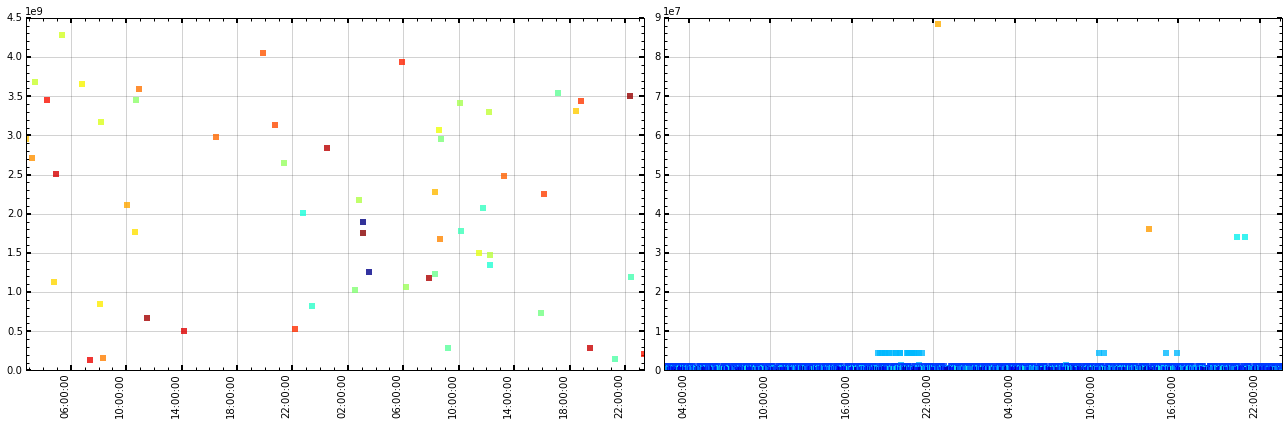

In [10]:
protocol = sorted(np.unique([item['Message']['ProtocolID'] for item in out]))

setup(figsize=(18,6))
for i,p in enumerate(np.unique(protocol)):
    j = 0 if p == 30 else 1
    setup(subplt=(1,2,j))
    for i, item in enumerate(out):
        msg = item['Message']
        if msg['ProtocolID'] != p:
            continue
        tmp = parse(item['Time'])
        color = colors[msg['EndpointID']]
        pylab.plot(tmp, msg['Consumption'], 's', color=color, lw=0, alpha=0.8, markeredgecolor='none')
    dateticks('%H:%M:%S', rotation=90)
pylab.tight_layout()


In [ ]:
# TODO push data into pandas